## 3(a)

 according to this website: https://jrgraphix.net/r/Unicode/0900-097F  , devnagri characters are between 2304 to 2341 in decimal


In [330]:
counter=1
lines_to_read=1000
file_list=[]
with open('hi.txt','r',encoding='utf8') as lines:
    for line in lines:
        if counter>lines_to_read:
            lines.close()
            break
        else:
            counter+=1
            file_list.append(line)
            
    lines.close()
    

In [331]:
#Example to show how python unicode treats halant character
my_list=[]
for w in 'द्वितीय':
    my_list.append(w)
print(my_list)

my_list=[]
for w in 'कंप्यूटर':
    my_list.append(w)
print(my_list)

my_list=[]
for w in 'अदरक':
    my_list.append(w)
print(my_list)

my_list=[]
for w in 'आदत':
    my_list.append(w)
print(my_list)

my_list=[]
for w in 'क्षत्रिय':
    my_list.append(w)
print(my_list)

my_list=[]
for w in 'अभ्यास':
    my_list.append(w)
print(my_list)

#seeing the below results, it seems that when there is half vyanjan as in क्ष then that half vyanjan has a halant infront of it
#but halant is missing incase of full vyanjans(for ex, no character is followed by halant incase of full vyanjans) this is a problem which needs to be corrected

#In python, we cannot denote a halant attached vyanjan in one character(python treats it as combination of 
#two characters, for ex, 'ल' + '्'  . But according to devnagari rules, a halant-attached-vyanjan should be
#treated as one single character(for ex, ल् ). So, for the purpose of representation, I will denote ल्  as 
#'ल' + '्' . 

['द', '्', 'व', 'ि', 'त', 'ी', 'य']
['क', 'ं', 'प', '्', 'य', 'ू', 'ट', 'र']
['अ', 'द', 'र', 'क']
['आ', 'द', 'त']
['क', '्', 'ष', 'त', '्', 'र', 'ि', 'य']
['अ', 'भ', '्', 'य', 'ा', 'स']


In [2]:
halant_dict={}
#chr(2381)=halant   chr(2325)=ka   chr(2361)=ha
for i in range(2325,2362):
    ans=chr(i)+chr(2381)
    #print(ans)
    halant_dict[chr(i)]=ans 

In [3]:
def check_vow(a):
    if (ord(a)>=2362 and ord(a)<=2391 or ord(a)>=2416 and ord(a)<=2423 or ord(a)>=2304 and ord(a)<=2324) and ord(a)!=2381:
        return True
    else:
        return False
    
def check_vyan(a):
    if ord(a)>=2325 and ord(a)<=2361:
        return True
    else:
        return False
    
def check_hal(a):
    if ord(a)==2381:
        return True
    else:
        return False

In [334]:
#UNIGRAM
'''correcting the mistake in unicode that it does not encode the halant character: devanagari consonant range 2325-2361'''


unigram_dict={}

n=len(file_list)
for i in range(n):
    line=file_list[i]
    for j in range(len(line)-1):
        #print(line[j])
        #print(ord(line[j]))
        if ord(line[j])<2304 or ord(line[j])>2431 or ord(line[j])==2381:       #means character is out-of-devanagari-script or halant
            continue
        
        #if j is last character of word
        if line[j+1]=='\n' or line[j+1]==' ' or line[j+1]=='|' or line[j+1]=='!' or line[j+1]=='.' or line[j+1]=='?':
            #if curr char is vyanjan
            if ord(line[j])>=2325 and ord(line[j])<=2361:    
                if halant_dict[line[j]] not in unigram_dict:
                    unigram_dict[halant_dict[line[j]]]=1
                else:
                    unigram_dict[halant_dict[line[j]]]+=1
                #there is missing अ so we need to increase its count
                if 'अ' not in unigram_dict:
                    unigram_dict['अ']=1
                else:
                    unigram_dict['अ']+=1
            #if curr char is not vyanjan
            elif ord(line[j])!=2404 and ord(line[j])!=2405:   #2404 is |  2405 is ||
                #print(line[j])
                if line[j] not in unigram_dict:
                    unigram_dict[line[j]]=1
                else:
                    unigram_dict[line[j]]+=1
                    
        
        #if curr character and next character are both vyanjan
        elif ord(line[j])>=2325 and ord(line[j])<=2361 and ord(line[j+1])>=2325 and ord(line[j+1])<=2361:     
            if halant_dict[line[j]] not in unigram_dict:
                unigram_dict[halant_dict[line[j]]]=1
            else:
                unigram_dict[halant_dict[line[j]]]+=1
            #there is missing अ so we need to increase its count
            if 'अ' not in unigram_dict:
                unigram_dict['अ']=1
            else:
                unigram_dict['अ']+=1
                
        
        #if curr is vyanjan and next is not vyanjan
        elif ord(line[j])>=2325 and ord(line[j])<=2361  and (ord(line[j+1])<2325 or ord(line[j+1])>2361):
            #print(line[j])
            if halant_dict[line[j]] not in unigram_dict:
                unigram_dict[halant_dict[line[j]]]=1
            else:
                unigram_dict[halant_dict[line[j]]]+=1
                
        #if curr is vowel
        elif check_vow(line[j]):
            if line[j] not in unigram_dict:
                unigram_dict[line[j]]=1
            else:
                unigram_dict[line[j]]+=1
                
        
  #2381 is the ord() value of halant
'''note that unicode value of standalone vowels and vowels at the end of consonant are different'''

#print(unigram_dict)    
unigram_dict=sorted(unigram_dict.items(), key=lambda x: x[1], reverse=True)



#top 100 most frequently occuring unigrams
top100_unigrams=[]
for key in unigram_dict:
    top100_unigrams.append(key[0])
#print(top100_unigrams)
textfile = open("3a-unigrams.txt", "w",encoding='utf8')
for element in top100_unigrams:
    textfile.write(element + "\n")
textfile.close()

In [335]:
#BIGRAM
bigram_dict={}

n=len(file_list)
for i in range(n):
    line=file_list[i]
    for j in range(len(line)-2):
        #print(line[j])
        #print(ord(line[j]))
        if ord(line[j])<2304 or ord(line[j])>2431 or ord(line[j])==2381:       #means character is out-of-devanagari-script or halant
            continue
        
        
        
        #if curr character and next character are both vyanjan
        elif ord(line[j])>=2325 and ord(line[j])<=2361 and ord(line[j+1])>=2325 and ord(line[j+1])<=2361:
            #curr vyanjan + 'अ' is a bigram
            term1=halant_dict[line[j]]
            term2='अ'
            bigram_term=term1+term2
            if bigram_term not in bigram_dict:
                bigram_dict[bigram_term]=1
            else:
                bigram_dict[bigram_term]+=1
                
            # 'अ'+next vyanjan term is also a bigram
            term1='अ'
            term2=halant_dict[line[j+1]]
            bigram_term=term1+term2
            if bigram_term not in bigram_dict:
                bigram_dict[bigram_term]=1
            else:
                bigram_dict[bigram_term]+=1
            
        
        #if curr is vyanjan and next is not vyanjan
        #two cases:
        #if next is halant
        if ord(line[j])>=2325 and ord(line[j])<=2361 and ord(line[j+1])==2381:
            if ord(line[j+2])<2304 or ord(line[j+2])>2431:       #means character is out-of-devanagari-script 
                continue
            term1=halant_dict[line[j]]
            if ord(line[j+2])>=2325 and ord(line[j+2])<=2361:
                term2=halant_dict[line[j+2]]
            else:
                term2=line[j+2]
            bigram_term=term1+term2
            if bigram_term not in bigram_dict:
                bigram_dict[bigram_term]=1
            else:
                bigram_dict[bigram_term]+=1
                
        #if next is vowel other than halant      ....first vowel:2362  last vowel:2391   other vowels:2304-2324  extra vowels:2416-2423
        elif ord(line[j])>=2325 and ord(line[j])<=2361 and (ord(line[j+1])>=2362 and ord(line[j+1])<=2391 or ord(line[j+1])>=2416 and ord(line[j+1])<=2423 ):
            term1=halant_dict[line[j]]                    
            term2=line[j+1]
            bigram_term=term1+term2
            if bigram_term not in bigram_dict:
                bigram_dict[bigram_term]=1
            else:
                bigram_dict[bigram_term]+=1
        
        '''if ord(line[j])>=2325 and ord(line[j])<=2361  and (ord(line[j+1])<2325 or ord(line[j+1])>2361):
            #print(line[j])
            if halant_dict[line[j]] not in bigram_dict:
                bigram_dict[halant_dict[line[j]]]=1
            else:
                bigram_dict[halant_dict[line[j]]]+=1'''
                
        #if curr is vowel and next is vyanjan
        if (ord(line[j])>=2362 and ord(line[j])<=2391 or ord(line[j])>=2416 and ord(line[j])<=2423 ) and ord(line[j+1])>=2325 and ord(line[j+1])<=2361:
            term1=line[j]
            term2=halant_dict[line[j+1]]
            bigram_term=term1+term2
            if bigram_term not in bigram_dict:
                bigram_dict[bigram_term]=1
            else:
                bigram_dict[bigram_term]+=1
        
        #if curr is vowel and next is vowel
        if (ord(line[j])>=2362 and ord(line[j])<=2391 or ord(line[j])>=2416 and ord(line[j])<=2423 ) and (ord(line[j+1])>=2362 and ord(line[j+1])<=2391 or ord(line[j+1])>=2416 and ord(line[j+1])<=2423 ):
            term1=line[j]
            term2=line[j+1]
            bigram_term=term1+term2
            if bigram_term not in bigram_dict:
                bigram_dict[bigram_term]=1
            else:
                bigram_dict[bigram_term]+=1

bigram_dict=sorted(bigram_dict.items(), key=lambda x: x[1], reverse=True)
top100_bigrams=[]
i=0
for key in bigram_dict:
    i+=1
    if i==101:
        break
    top100_bigrams.append(key[0])
#top 100 bigrams in order of their frequency
#print(top100_bigrams)
textfile = open("3a-bigrams.txt", "w",encoding='utf8')
for element in top100_bigrams:
    textfile.write(element + "\n")
textfile.close()

In [336]:
#TRIGRAMS
trigram_dict={}
n=len(file_list)
for i in range(n):
    line=file_list[i]
    for j in range(len(line)-3):
        #print(line[j])
        #print(ord(line[j]))
        if ord(line[j])<2304 or ord(line[j])>2431 or ord(line[j])==2381:       #means character is out-of-devanagari-script or halant
            continue
        
        #curr is vyanjan,second is vyanjan, third is vyanjan
        if ord(line[j])>=2325 and ord(line[j])<=2361   and   ord(line[j+1])>=2325 and ord(line[j+1])<=2361   and   ord(line[j+2])>=2325 and ord(line[j+2])<=2361:
            term1=halant_dict[line[j]]
            term2='अ'
            term3=halant_dict[line[j+1]]
            trig_term=term1+term2+term3
            if trig_term not in trigram_dict:
                trigram_dict[trig_term]=1
            else:
                trigram_dict[trig_term]+=1
                
            term1='अ'
            term2=halant_dict[line[j+1]]
            term3='अ'
            trig_term=term1+term2+term3
            if trig_term not in trigram_dict:
                trigram_dict[trig_term]=1
            else:
                trigram_dict[trig_term]+=1
                
        #curr is vyanjan, second is vyanjan, third is vowel
        #two cases
        #third is halant
        elif ord(line[j])>=2325 and ord(line[j])<=2361   and   ord(line[j+1])>=2325 and ord(line[j+1])<=2361 and ord(line[j+2])==2381:
            term1=halant_dict[line[j]]
            term2='अ'
            term3=halant_dict[line[j+1]]
            trig_term=term1+term2+term3
            if trig_term not in trigram_dict:
                trigram_dict[trig_term]=1
            else:
                trigram_dict[trig_term]+=1
                
            term1='अ'
            term2=halant_dict[line[j+1]]
            if ord(line[j+3])<2304 or ord(line[j+3])>2431:       #means character is out-of-devanagari-script 
                continue
            if ord(line[j+3])>=2325 and ord(line[j+3])<=2361:
                term3=halant_dict[line[j+3]]
            elif check_vow(line[j+3]):
                term3=line[j+3]
            elif check_vow(line[j+4]):
                term3=line[j+4]
            elif check_vyan(line[j+4]):
                term3=halant_dict[line[j+4]]
            trig_term=term1+term2+term3
            if trig_term not in trigram_dict:
                trigram_dict[trig_term]=1
            else:
                trigram_dict[trig_term]+=1
        #third is vowel
        elif ord(line[j])>=2325 and ord(line[j])<=2361   and   ord(line[j+1])>=2325 and ord(line[j+1])<=2361 and (ord(line[j+2])>=2362 and ord(line[j+2])<=2391 or ord(line[j+2])>=2416 and ord(line[j+2])<=2423 ):
            term1=halant_dict[line[j]]
            term2='अ'
            term3=halant_dict[line[j+1]]
            trig_term=term1+term2+term3
            if trig_term not in trigram_dict:
                trigram_dict[trig_term]=1
            else:
                trigram_dict[trig_term]+=1
                
            term1='अ'
            term2=halant_dict[line[j+1]]
            term3=line[j+2]
            trig_term=term1+term2+term3
            if trig_term not in trigram_dict:
                trigram_dict[trig_term]=1
            else:
                trigram_dict[trig_term]+=1
                
                
        #curr is vyanjan, second is vowel, third is vyanjan
        #two cases
        #second is halant
        elif ord(line[j])>=2325 and ord(line[j])<=2361 and ord(line[j+1])==2381 and ord(line[j+2])>=2325 and ord(line[j+2])<=2361:
            term1=halant_dict[line[j]]
            term2=halant_dict[line[j+2]]
            if ord(line[j+3])<2304 or ord(line[j+3])>2431:       #means character is out-of-devanagari-script 
                continue
            if ord(line[j+3])>=2325 and ord(line[j+3])<=2361:
                term3=halant_dict[line[j+3]]
            elif check_vow(line[j+3]):
                term3=line[j+3]
            elif check_vow(line[j+4]):
                term3=line[j+4]
            elif check_vyan(line[j+4]):
                term3=halant_dict[line[j+4]]
            trig_term=term1+term2+term3
            if trig_term not in trigram_dict:
                trigram_dict[trig_term]=1
            else:
                trigram_dict[trig_term]+=1
                
        #second is non halant vowel
        elif ord(line[j])>=2325 and ord(line[j])<=2361 and (check_vow(line[j+1])) and ord(line[j+2])>=2325 and ord(line[j+2])<=2361:
            term1=halant_dict[line[j]]
            term2=line[j+1]
            term3=halant_dict[line[j+2]]
            trig_term=term1+term2+term3
            if trig_term not in trigram_dict:
                trigram_dict[trig_term]=1
            else:
                trigram_dict[trig_term]+=1
                
        #curr vyanjan,sec vowel, third vowel
        elif check_vyan(line[j]) and check_vow(line[j+1]) and check_vow(line[j+2]):
            term1=halant_dict[line[j]]
            term2=line[j+1]
            term3=line[j+2]
            trig_term=term1+term2+term3
            if trig_term not in trigram_dict:
                trigram_dict[trig_term]=1
            else:
                trigram_dict[trig_term]+=1
                
        elif check_vyan(line[j]) and check_vow(line[j+1]) and check_hal(line[j+2]):
                
            term1=halant_dict[line[j]]
            term2=line[j+1]
            if ord(line[j+3])<2304 or ord(line[j+3])>2431:       #means character is out-of-devanagari-script 
                continue
            if ord(line[j+3])>=2325 and ord(line[j+3])<=2361:
                term3=halant_dict[line[j+3]]
            else:
                term3=line[j+3]
            trig_term=term1+term2+term3
            if trig_term not in trigram_dict:
                trigram_dict[trig_term]=1
            else:
                trigram_dict[trig_term]+=1
                    
        elif check_vyan(line[j]) and check_hal(line[j+1]) and check_vow(line[j+2]): #--> this section wont run bcz vowel is not followed by halant in python unicode
                
            term1=halant_dict[line[j]]
            if ord(line[j+2])<2304 or ord(line[j+2])>2431:       #means character is out-of-devanagari-script 
                continue
            if ord(line[j+2])>=2325 and ord(line[j+2])<=2361:
                term2=halant_dict[line[j+2]]
            else:
                term2=line[j+2]
            if ord(line[j+3])<2304 or ord(line[j+3])>2431:       #means character is out-of-devanagari-script 
                continue
            if ord(line[j+3])>=2325 and ord(line[j+3])<=2361:
                term3=halant_dict[line[j+3]]
            elif check_vow(line[j+3]):
                term3=line[j+3]
            elif check_vow(line[j+4]):
                term3=line[j+4]
            elif check_vyan(line[j+4]):
                term3=halant_dict[line[j+4]]
            trig_term=term1+term2+term3
            if trig_term not in trigram_dict:
                trigram_dict[trig_term]=1
            else:
                trigram_dict[trig_term]+=1
                    
            #if check_vyan(line[j]) and check_hal(line[j+1]) and check_hal(line[j+2]):  -->assuming this wont be in top100 most frequent trigrams
                #term1=halant_dict[line[j]]
                #term2=
        #curr is vowel,second is vyanjan, third is vyanjan
        elif check_vow(line[j]) and check_vyan(line[j+1]) and check_vyan(line[j+2]):
            term1=line[j]
            term2=halant_dict[line[j+1]]
            term3='अ'
            trig_term=term1+term2+term3
            if trig_term not in trigram_dict:
                trigram_dict[trig_term]=1
            else:
                trigram_dict[trig_term]+=1
        
        #curr is vowel, second is vyanjan, third is vowel
        elif check_vow(line[j]) and check_vyan(line[j+1]) and check_vow(line[j+2]):
            term1=line[j]
            term2=halant_dict[line[j+1]]
            term3=line[j+2]
            trig_term=term1+term2+term3
            if trig_term not in trigram_dict:
                trigram_dict[trig_term]=1
            else:
                trigram_dict[trig_term]+=1
        
        elif check_vow(line[j]) and check_vyan(line[j+1]) and check_hal(line[j+2]):
            term1=line[j]
            term2=halant_dict[line[j+1]]
            if ord(line[j+3])<2304 or ord(line[j+3])>2431:       #means character is out-of-devanagari-script 
                continue
            if ord(line[j+3])>=2325 and ord(line[j+3])<=2361:
                term3=halant_dict[line[j+3]]
            elif check_vow(line[j+3]):
                term3=line[j+3]
            elif check_vow(line[j+4]):
                
                term3=line[j+4]
            elif check_vyan(line[j+4]):
                
                term3=halant_dict[line[j+4]]
            trig_term=term1+term2+term3
            if trig_term not in trigram_dict:
                trigram_dict[trig_term]=1
            else:
                trigram_dict[trig_term]+=1
        
        #curr is vowel, second is vowel, third is vyanjan
            
        #if check_vow(line[j]) and check_hal(line[j+1]) and check_vyan(line[j+2]): -->not possible
            
        
        
        #removed two consecutive vowels beccause they cant be frequent as shown by bigrams
            
        #if check_vow(line[j]) and check_hal(line[j+1]) and check_vow(line[j+2]):  --> not possible
trigram_dict=sorted(trigram_dict.items(), key=lambda x: x[1], reverse=True)
top100_trigrams=[]
i=0
for key in trigram_dict:
    i+=1
    if i==101:
        break
    top100_trigrams.append(key[0])
#top 100 bigrams in order of their frequency
textfile = open("3a-trigrams.txt", "w",encoding='utf8')
for element in top100_trigrams:
    textfile.write(element + "\n")
textfile.close()
      

In [337]:
#QUADRIGRAMS
quadrigram_dict={}
n=len(file_list)
for i in range(n):
    line=file_list[i]
    for j in range(len(line)-4):   #minus 4 is correct because there is a newline character at the end of every line in file_list
        #print(line[j])
        #print(ord(line[j]))
        if ord(line[j])<2304 or ord(line[j])>2431 or ord(line[j])==2381:       #means character is out-of-devanagari-script or halant
            continue
            
        #1=vy 2=vy 3=vy 4=vy
        if check_vyan(line[j]) and check_vyan(line[j+1]) and check_vyan(line[j+2]) and check_vyan(line[j+3]):
            term1=halant_dict[line[j]]
            term2='अ'
            term3=halant_dict[line[j+1]]
            term4='अ'
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict:
                quadrigram_dict[qterm]=1
            else:
                quadrigram_dict[qterm]+=1
                
            term1='अ'
            term2=halant_dict[line[j+1]]
            term3='अ'
            term4=halant_dict[line[j+2]]
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict:
                quadrigram_dict[qterm]=1
            else:
                quadrigram_dict[qterm]+=1
            
            
        
        #1=vy 2=vy 3=vy 4=vo
        elif check_vyan(line[j]) and check_vyan(line[j+1]) and check_vyan(line[j+2]) and check_vow(line[j+3]):
            term1=halant_dict[line[j]]
            term2='अ'
            term3=halant_dict[line[j+1]]
            term4='अ'
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict:
                quadrigram_dict[qterm]=1
            else:
                quadrigram_dict[qterm]+=1
                
            term1='अ'
            term2=halant_dict[line[j+1]]
            term3='अ'
            term4=halant_dict[line[j+2]]
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict:
                quadrigram_dict[qterm]=1
            else:
                quadrigram_dict[qterm]+=1
        
        #1=vy 2=vy 3=vo 4=vy
        #two cases:
        #3=vow
        elif check_vyan(line[j]) and check_vyan(line[j+1]) and check_vow(line[j+2]) and check_vyan(line[j+3]):
            term1=halant_dict[line[j]]
            term2='अ'
            term3=halant_dict[line[j+1]]
            term4=line[j+2]
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict:
                quadrigram_dict[qterm]=1
            else:
                quadrigram_dict[qterm]+=1
                
            term1='अ'
            term2=halant_dict[line[j+1]]
            term3=line[j+2]
            term4=halant_dict[line[j+3]]
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict:
                quadrigram_dict[qterm]=1
            else:
                quadrigram_dict[qterm]+=1
        
        #3=halant
        elif check_vyan(line[j]) and check_vyan(line[j+1]) and check_hal(line[j+2]) and check_vyan(line[j+3]):
            term1=halant_dict[line[j]]
            term2='अ'
            term3=halant_dict[line[j+1]]
            term4=halant_dict[line[j+3]]
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict:
                quadrigram_dict[qterm]=1
            else:
                quadrigram_dict[qterm]+=1
                
            term1='अ'
            term2=halant_dict[line[j+1]]
            term3=halant_dict[line[j+3]]
            if ord(line[j+4])<2304 or ord(line[j+4])>2431:       #means character is out-of-devanagari-script 
                continue
            if check_vyan(line[j+4]):
                term4='अ'
            elif check_vow(line[j+4]):
                term4=line[j+4]
            elif check_vyan(line[j+5]):
                term4=halant_dict[line[j+5]]
            else:
                term4=line[j+5]
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict:
                quadrigram_dict[qterm]=1
            else:
                quadrigram_dict[qterm]+=1
        
        #1=vy 2=vy 3=vo 4=vo  --> considering this cannot be frequent bcz of two vowels
        
        #1=vy 2=vo 3=vy 4=vy
        elif check_vyan(line[j]) and check_vow(line[j+1]) and check_vyan(line[j+2]) and check_vyan(line[j+3]):
            term1=halant_dict[line[j]]
            term2=line[j+1]
            term3=halant_dict[line[j+2]]
            term4='अ'
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict:
                quadrigram_dict[qterm]=1
            else:
                quadrigram_dict[qterm]+=1
        elif check_vyan(line[j]) and check_hal(line[j+1]) and check_vyan(line[j+2]) and check_vyan(line[j+3]):
            term1=halant_dict[line[j]]
            term2=halant_dict[line[j+2]]
            term3='अ'
            term4=halant_dict[line[j+3]]
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict:
                quadrigram_dict[qterm]=1
            else:
                quadrigram_dict[qterm]+=1
        
        #1=vy 2=vo 3=vy 4=vo
        elif check_vyan(line[j]) and check_vow(line[j+1]) and check_vyan(line[j+2]) and check_vow(line[j+3]):
            term1=halant_dict[line[j]]
            term2=line[j+1]
            term3=halant_dict[line[j+2]]
            term4=line[j+3]
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict:
                quadrigram_dict[qterm]=1
            else:
                quadrigram_dict[qterm]+=1
            
        elif check_vyan(line[j]) and check_hal(line[j+1]) and check_vyan(line[j+2]) and check_vow(line[j+3]):
            term1=halant_dict[line[j]]
            term2=halant_dict[line[j+2]]
            term3=line[j+3]
            if ord(line[j+4])<2304 or ord(line[j+4])>2431:       #means character is out-of-devanagari-script 
                continue
            if check_vow(line[j+4]):
                term4=line[j+4]
            elif check_vyan(line[j+4]):
                term4=halant_dict[line[j+4]]
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict:
                quadrigram_dict[qterm]=1
            else:
                quadrigram_dict[qterm]+=1
        elif check_vyan(line[j]) and check_vow(line[j+1]) and check_vyan(line[j+2]) and check_hal(line[j+3]):
            term1=halant_dict[line[j]]
            term2=line[j+1]
            term3=halant_dict[line[j+2]]
            if ord(line[j+4])<2304 or ord(line[j+4])>2431:       #means character is out-of-devanagari-script 
                continue
            elif check_vow(line[j+4]):
                term4=line[j+4]
            else:
                term4=halant_dict[line[j+4]]
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict:
                quadrigram_dict[qterm]=1
            else:
                quadrigram_dict[qterm]+=1
        
        elif check_vyan(line[j]) and check_hal(line[j+1]) and check_vyan(line[j+2]) and check_hal(line[j+3]):
            term1=halant_dict[line[j]]
            term2=halant_dict[line[j+2]]
            if ord(line[j+4])<2304 or ord(line[j+4])>2431:       #means character is out-of-devanagari-script 
                continue
            elif check_vow(line[j+4]):
                term3=line[j+4]
            else:
                term4=halant_dict[line[j+4]]
                
            if ord(line[j+5])<2304 or ord(line[j+5])>2431:       #means character is out-of-devanagari-script 
                continue
            elif check_vow(line[j+5]):
                term4=line[j+5]
            else:
                term4=halant_dict[line[j+5]]
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict:
                quadrigram_dict[qterm]=1
            else:
                quadrigram_dict[qterm]+=1
        #1=vy 2=vo 3=vo 4=vy  --> considering this cannot be frequent bcz of two vowels
        
        #1=vy 2=vo 3=vo 4=vo  --> considering this cannot be frequent bcz of two vowels
        
        #1=vo 2=vy 3=vy 4=vy
        elif check_vow(line[j]) and check_vyan(line[j+1]) and check_vyan(line[j+2]) and check_vyan(line[j+3]):
            term1=line[j]
            term2=halant_dict[line[j+1]]
            term3='अ'
            term4=halant_dict[line[j+2]]
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict:
                quadrigram_dict[qterm]=1
            else:
                quadrigram_dict[qterm]+=1
        
        #1=vo 2=vy 3=vy 4=vo
        elif check_vow(line[j]) and check_vyan(line[j+1]) and check_vyan(line[j+2]) and check_vow(line[j+3]):
            term1=line[j]
            term2=halant_dict[line[j+1]]
            term3='अ'
            term4=halant_dict[line[j+2]]
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict:
                quadrigram_dict[qterm]=1
            else:
                quadrigram_dict[qterm]+=1
        
        #1=vo 2=vy 3=vo 4=vy
        elif check_vow(line[j]) and check_vyan(line[j+1]) and check_vow(line[j+2]) and check_vyan(line[j+3]):
            term1=line[j]
            term2=halant_dict[line[j+1]]
            term3=line[j+2]
            term4=halant_dict[line[j+3]]
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict:
                quadrigram_dict[qterm]=1
            else:
                quadrigram_dict[qterm]+=1
        
        #1=vo 2=vy 3=vo 4=vo  --> considering this cannot be frequent bcz of two vowels
        
        #1=vo 2=vo 3=vy 4=vy  --> considering this cannot be frequent bcz of two vowels
        
        #1=vo 2=vo 3=vy 4=vo  --> considering this cannot be frequent bcz of two vowels
        
        #1=vo 2=vo 3=vo 4=vy  --> considering this cannot be frequent bcz of two vowels
        
        #1=vo 2=vo 3=vo 4=vo  --> considering this cannot be frequent bcz of two vowels
        
quadrigram_dict=sorted(quadrigram_dict.items(), key=lambda x: x[1], reverse=True)
top100_quadrigrams=[]
i=0
for key in quadrigram_dict:
    i+=1
    if i==101:
        break
    top100_quadrigrams.append(key[0])
#top 100 bigrams in order of their frequency
textfile = open("3a-quadrigrams.txt", "w",encoding='utf8')
for element in top100_quadrigrams:
    textfile.write(element + "\n")
textfile.close()

In [338]:
print(check_vow('्'))

False


In [339]:
len('क्')

2

In [340]:
for w in 'उन्अक्': 
    print(w)

उ
न
्
अ
क
्


In [341]:
for w in 'स्थिति':
    print(w)

स
्
थ
ि
त
ि


## Ans 3b

In [342]:
import re
unigram_word={}
bigram_word={}
trigram_word={}

for i in range(0,len(file_list)):
    line=file_list[i].split(' ')
    line=[re.sub(',','',word) for word in line]
    line=[re.sub('\.','',word) for word in line]
    line=[re.sub('।','',word) for word in line]
    line=[re.sub('\?','',word) for word in line]
    line=[re.sub('\\n','',word) for word in line]
    n=len(line)
    for j in range(len(line)):
        if line[j] not in unigram_word:
            unigram_word[line[j]]=1
        else:
            unigram_word[line[j]]+=1
        
        if j+1>n-1:
            continue
        bigram=line[j]+' '+line[j+1] 
        if bigram not in bigram_word:
            bigram_word[bigram]=1
        else:
            bigram_word[bigram]+=1
        
        if j+2>n-1:
            continue
        trigram=line[j]+' '+line[j+1]+' '+line[j+2]
        if trigram not in trigram_word:
            trigram_word[trigram]=1
        else:
            trigram_word[trigram]+=1
            


In [343]:
unigram_word=sorted(unigram_word.items(), key=lambda x: x[1], reverse=True)
top100_unigrams=[]
i=0
for key in unigram_word:
    i+=1
    if i==101:
        break
    top100_unigrams.append(key[0])
#top 100 bigrams in order of their frequency
textfile = open("3b-unigrams.txt", "w",encoding='utf8')
for element in top100_unigrams:
    textfile.write(element + "\n")
textfile.close()

bigram_word=sorted(bigram_word.items(), key=lambda x: x[1], reverse=True)
top100_bigrams=[]
i=0
for key in bigram_word:
    i+=1
    if i==101:
        break
    top100_bigrams.append(key[0])
#top 100 bigrams in order of their frequency
textfile = open("3b-bigrams.txt", "w",encoding='utf8')
for element in top100_bigrams:
    textfile.write(element + "\n")
textfile.close()

trigram_word=sorted(trigram_word.items(), key=lambda x: x[1], reverse=True)
top100_trigrams=[]
i=0
for key in trigram_word:
    i+=1
    if i==101:
        break
    top100_trigrams.append(key[0])
#top 100 bigrams in order of their frequency
textfile = open("3b-trigrams.txt", "w",encoding='utf8')
for element in top100_trigrams:
    textfile.write(element + "\n")
textfile.close()

## Ans 3c

In [27]:
def get_syllables(word):
        comp_syllable = list()
        for char in word:
            #print(comp_syllable)
            if char in ['\\n','.', '\"', '\'', '`', '!', ';', ', ', '?']:
                comp_syllable.append(char)
            elif ord(char)>=2366 and ord(char)<=2381 or ord(char)==2306 or ord(char)==2307:
                if len(comp_syllable)>0:
                    comp_syllable[len(comp_syllable)-1] = comp_syllable[len(comp_syllable)-1] + char
                else :
                    comp_syllable.append(char)
            elif ord(char)!=2306:
                try:
                    last_idx=len(comp_syllable[len(comp_syllable)-1])-1
                    if ord(comp_syllable[len(comp_syllable)-1][last_idx]) == 2381:  #last index is halant
                        comp_syllable[len(comp_syllable)-1] = comp_syllable[len(comp_syllable)-1] + char
                    else:
                        comp_syllable.append(char)
                except IndexError:
                    comp_syllable.append(char)

        return comp_syllable

In [346]:
get_syllables('अदरक')

['अ', 'द', 'र', 'क']

In [347]:
get_syllables('कंप्यूटर')

['कं', 'प्यू', 'ट', 'र']

In [29]:
get_syllables('अंग्रेज')

['अं', 'ग्रे', 'ज']

In [348]:
syllables=list()
unigram_syllable={}
bigram_syllable={}
trigram_syllable={}
for i in range(len(file_list)):
    line=file_list[i].split(' ')
    line=[re.sub(',','',word) for word in line]
    line=[re.sub('\.','',word) for word in line]
    line=[re.sub('।','',word) for word in line]
    line=[re.sub('\?','',word) for word in line]
    line=[re.sub('\\n','',word) for word in line]
    n=len(line)
    for j in range(len(line)):        
        syll_word_list = get_syllables(line[j])
        for k in range(len(syll_word_list)):
            syllables.append(syll_word_list[k])
            
    for i in range(2,len(syllables)):   #i should start from 2 because we are going upto 2 steps backwards i.e upto i-2 while indexing
        if syllables[i] not in unigram_syllable:
            unigram_syllable[syllables[i]]=1
        else :
            unigram_syllable[syllables[i]]+=1
            
        bigram_term=syllables[i-1]+' '+syllables[i]
        if bigram_term not in bigram_syllable:
            bigram_syllable[bigram_term]=1
        else :
            bigram_syllable[bigram_term]+=1  
        
        trigram_term=syllables[i-2]+' '+syllables[i-1]+' '+syllables[i]
        if trigram_term not in  trigram_syllable:
            trigram_syllable[trigram_term]=1
        else :
            trigram_syllable[trigram_term]+=1  




In [26]:
unigram_syllable=sorted(unigram_syllable.items(), key=lambda x: x[1], reverse=True)
top100_unigrams=[]
i=0
for key in unigram_syllable:
    i+=1
    if i==101:
        break
    top100_unigrams.append(key[0])
#top 100 bigrams in order of their frequency
textfile = open("3c-unigrams.txt", "w",encoding='utf8')
for element in top100_unigrams:
    textfile.write(element + "\n")
textfile.close()

bigram_syllable=sorted(bigram_syllable.items(), key=lambda x: x[1], reverse=True)
top100_bigrams=[]
i=0
for key in bigram_syllable:
    i+=1
    if i==101:
        break
    top100_bigrams.append(key[0])
#top 100 bigrams in order of their frequency
textfile = open("3c-bigrams.txt", "w",encoding='utf8')
for element in top100_bigrams:
    textfile.write(element + "\n")
textfile.close()

trigram_syllable=sorted(trigram_syllable.items(), key=lambda x: x[1], reverse=True)
top100_trigrams=[]
i=0
for key in trigram_syllable:
    i+=1
    if i==101:
        break
    top100_trigrams.append(key[0])
#top 100 bigrams in order of their frequency
textfile = open("3c-trigrams.txt", "w",encoding='utf8')
for element in top100_trigrams:
    textfile.write(element + "\n")
textfile.close()

NameError: name 'unigram_syllable' is not defined

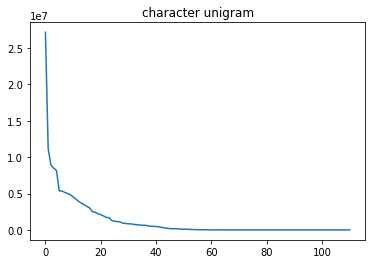

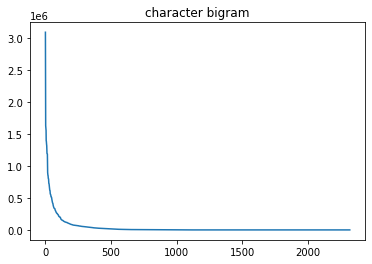

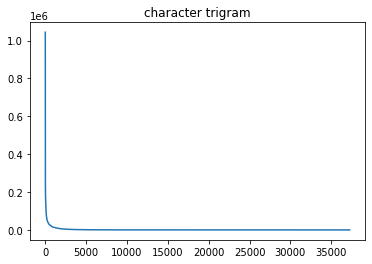

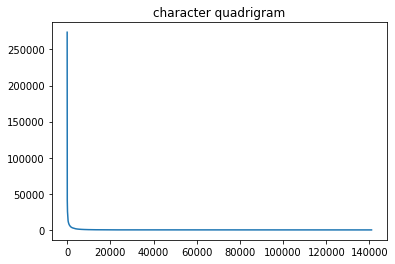

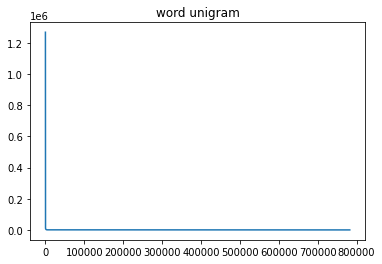

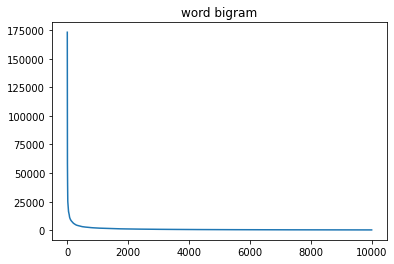

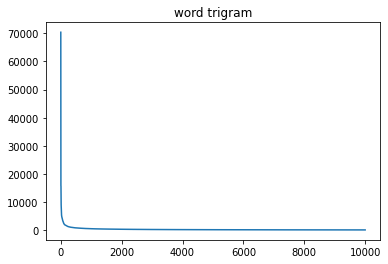

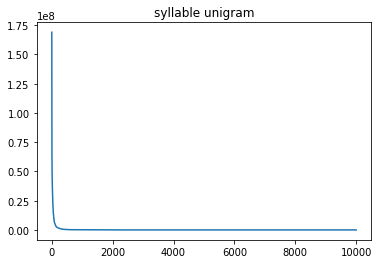

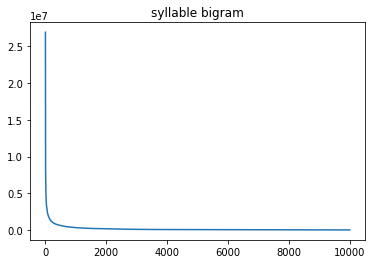

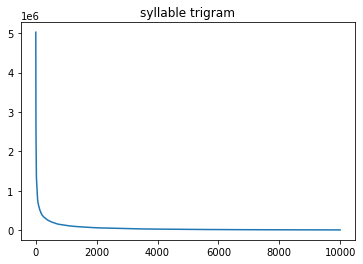

In [3]:
#plotting

import pickle

#character unigrams
fc=open('3a-unigrams-dict.pkl','rb')
my_dict=pickle.load(fc)
fc.close()
x_axis=[]
y_axis=[]
my_dict.sort(key=lambda a: a[1],reverse=True)
i=0
for j in range(len(my_dict)):
    x_axis.append(i)
    y_axis.append(my_dict[j][1])
    i+=1
import matplotlib.pyplot as plt   
graph=plt.figure()
plt.title('character unigram')
plt.plot(x_axis,y_axis)
plt.show()

#character bigrams
fc=open('3a-bigrams-dict.pkl','rb')
my_dict=pickle.load(fc)
fc.close()
x_axis=[]
y_axis=[]
my_dict.sort(key=lambda a: a[1],reverse=True)
i=0
for j in range(len(my_dict)):
    x_axis.append(i)
    y_axis.append(my_dict[j][1])
    i+=1

graph=plt.figure()
plt.title('character bigram')
plt.plot(x_axis,y_axis)
plt.show()

#character trigrams
fc=open('3a-trigrams-dict.pkl','rb')
my_dict=pickle.load(fc)
fc.close()
x_axis=[]
y_axis=[]
my_dict.sort(key=lambda a: a[1],reverse=True)
i=0
for j in range(len(my_dict)):
    x_axis.append(i)
    y_axis.append(my_dict[j][1])
    i+=1

graph=plt.figure()
plt.title('character trigram')
plt.plot(x_axis,y_axis)
plt.show()

#character quadrigrams
fc=open('3a-quadrigrams-dict.pkl','rb')
my_dict=pickle.load(fc)
fc.close()
x_axis=[]
y_axis=[]
my_dict.sort(key=lambda a: a[1],reverse=True)
i=0
for j in range(len(my_dict)):
    x_axis.append(i)
    y_axis.append(my_dict[j][1])
    i+=1
import matplotlib.pyplot as plt   
graph=plt.figure()
plt.title('character quadrigram')
plt.plot(x_axis,y_axis)
plt.show()

#word unigrams
fc=open('3b-unigrams-dict.pkl','rb')
my_dict=pickle.load(fc)
fc.close()
x_axis=[]
y_axis=[]
my_dict.sort(key=lambda a: a[1],reverse=True)
i=0
for j in range(len(my_dict)):
    x_axis.append(i)
    y_axis.append(my_dict[j][1])
    i+=1

graph=plt.figure()
plt.title('word unigram')
plt.plot(x_axis,y_axis)
plt.show()

#word bigrams
fc=open('3b-bigrams-dict.pkl','rb')
my_dict=pickle.load(fc)
fc.close()
x_axis=[]
y_axis=[]
#print(my_dict)
my_dict.sort(key=lambda a: a[1],reverse=True)
i=0
for j in range(len(my_dict)):
    if i>10000:
        break
    x_axis.append(i)
    y_axis.append(my_dict[j][1])
    i+=1

graph=plt.figure()
plt.title('word bigram')
plt.plot(x_axis,y_axis)
plt.show()


#word trigrams
fc=open('3b-trigrams-dict.pkl','rb')
my_dict=pickle.load(fc)
fc.close()
x_axis=[]
y_axis=[]
my_dict.sort(key=lambda a: a[1],reverse=True)
i=0
for j in range(len(my_dict)):
    if i>10000:
        break
    x_axis.append(i)
    y_axis.append(my_dict[j][1])
    i+=1
    
graph=plt.figure()
plt.title('word trigram')
plt.plot(x_axis,y_axis)
plt.show()


#syllable unigrams
fc=open('3c-unigram-dict.pickle','rb')
my_dict=pickle.load(fc)
fc.close()
x_axis=[]
y_axis=[]

my_dict=dict(sorted(my_dict.items(),key=lambda a: a[1],reverse=True))
#print(my_dict)
i=0
for j in my_dict:
    if i>10000:
        break
    x_axis.append(i)
    y_axis.append(my_dict[j])
    i+=1
    
graph=plt.figure()
plt.title('syllable unigram')
plt.plot(x_axis,y_axis)
plt.show()

#syllable bigrams
fc=open('3c-bigram-dict.pickle','rb')
my_dict=pickle.load(fc)
fc.close()
x_axis=[]
y_axis=[]
my_dict=dict(sorted(my_dict.items(),key=lambda a: a[1],reverse=True))
#print(my_dict)
i=0
for j in my_dict:
    if i>10000:
        break
    x_axis.append(i)
    y_axis.append(my_dict[j])
    i+=1
    
graph=plt.figure()
plt.title('syllable bigram')
plt.plot(x_axis,y_axis)
plt.show()

#syllable trigrams
fc=open('3c-trigram-dict.pickle','rb')
my_dict=pickle.load(fc)
fc.close()
x_axis=[]
y_axis=[]
my_dict=dict(sorted(my_dict.items(),key=lambda a: a[1],reverse=True))
#print(my_dict)
i=0
for j in my_dict:
    if i>10000:
        break
    x_axis.append(i)
    y_axis.append(my_dict[j])
    i+=1
    
graph=plt.figure()
plt.title('syllable trigram')
plt.plot(x_axis,y_axis)
plt.show()


In [51]:
quadrigram_dict_temp={}

def quad_char(word):
    line=word
    for j in range(len(line)-3):   #minus 4 is correct because there is a newline character at the end of every line in file_list
        #print(line[j])
        #print(ord(line[j]))
        if ord(line[j])<2304 or ord(line[j])>2431 or ord(line[j])==2381:       #means character is out-of-devanagari-script or halant
            continue
            
        #1=vy 2=vy 3=vy 4=vy
        if check_vyan(line[j]) and check_vyan(line[j+1]) and check_vyan(line[j+2]) and check_vyan(line[j+3]):
            term1=halant_dict[line[j]]
            term2='अ'
            term3=halant_dict[line[j+1]]
            term4='अ'
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict_temp:
                quadrigram_dict_temp[qterm]=1
            else:
                quadrigram_dict_temp[qterm]+=1
                
            term1='अ'
            term2=halant_dict[line[j+1]]
            term3='अ'
            term4=halant_dict[line[j+2]]
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict_temp:
                quadrigram_dict_temp[qterm]=1
            else:
                quadrigram_dict_temp[qterm]+=1
            
            
        
        #1=vy 2=vy 3=vy 4=vo
        elif check_vyan(line[j]) and check_vyan(line[j+1]) and check_vyan(line[j+2]) and check_vow(line[j+3]):
            term1=halant_dict[line[j]]
            term2='अ'
            term3=halant_dict[line[j+1]]
            term4='अ'
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict_temp:
                quadrigram_dict_temp[qterm]=1
            else:
                quadrigram_dict_temp[qterm]+=1
                
            term1='अ'
            term2=halant_dict[line[j+1]]
            term3='अ'
            term4=halant_dict[line[j+2]]
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict_temp:
                quadrigram_dict_temp[qterm]=1
            else:
                quadrigram_dict_temp[qterm]+=1
        
        #1=vy 2=vy 3=vo 4=vy
        #two cases:
        #3=vow
        elif check_vyan(line[j]) and check_vyan(line[j+1]) and check_vow(line[j+2]) and check_vyan(line[j+3]):
            term1=halant_dict[line[j]]
            term2='अ'
            term3=halant_dict[line[j+1]]
            term4=line[j+2]
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict_temp:
                quadrigram_dict_temp[qterm]=1
            else:
                quadrigram_dict_temp[qterm]+=1
                
            term1='अ'
            term2=halant_dict[line[j+1]]
            term3=line[j+2]
            term4=halant_dict[line[j+3]]
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict_temp:
                quadrigram_dict_temp[qterm]=1
            else:
                quadrigram_dict_temp[qterm]+=1
        
        #3=halant
        elif check_vyan(line[j]) and check_vyan(line[j+1]) and check_hal(line[j+2]) and check_vyan(line[j+3]):
            term1=halant_dict[line[j]]
            term2='अ'
            term3=halant_dict[line[j+1]]
            term4=halant_dict[line[j+3]]
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict_temp:
                quadrigram_dict_temp[qterm]=1
            else:
                quadrigram_dict_temp[qterm]+=1
                
            term1='अ'
            term2=halant_dict[line[j+1]]
            term3=halant_dict[line[j+3]]
            if ord(line[j+4])<2304 or ord(line[j+4])>2431:       #means character is out-of-devanagari-script 
                continue
            if check_vyan(line[j+4]):
                term4='अ'
            elif check_vow(line[j+4]):
                term4=line[j+4]
            elif check_vyan(line[j+5]):
                term4=halant_dict[line[j+5]]
            else:
                term4=line[j+5]
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict_temp:
                quadrigram_dict_temp[qterm]=1
            else:
                quadrigram_dict_temp[qterm]+=1
        
        #1=vy 2=vy 3=vo 4=vo  --> considering this cannot be frequent bcz of two vowels
        
        #1=vy 2=vo 3=vy 4=vy
        elif check_vyan(line[j]) and check_vow(line[j+1]) and check_vyan(line[j+2]) and check_vyan(line[j+3]):
            term1=halant_dict[line[j]]
            term2=line[j+1]
            term3=halant_dict[line[j+2]]
            term4='अ'
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict_temp:
                quadrigram_dict_temp[qterm]=1
            else:
                quadrigram_dict_temp[qterm]+=1
        elif check_vyan(line[j]) and check_hal(line[j+1]) and check_vyan(line[j+2]) and check_vyan(line[j+3]):
            term1=halant_dict[line[j]]
            term2=halant_dict[line[j+2]]
            term3='अ'
            term4=halant_dict[line[j+3]]
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict_temp:
                quadrigram_dict_temp[qterm]=1
            else:
                quadrigram_dict_temp[qterm]+=1
        
        #1=vy 2=vo 3=vy 4=vo
        elif check_vyan(line[j]) and check_vow(line[j+1]) and check_vyan(line[j+2]) and check_vow(line[j+3]):
            term1=halant_dict[line[j]]
            term2=line[j+1]
            term3=halant_dict[line[j+2]]
            term4=line[j+3]
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict_temp:
                quadrigram_dict_temp[qterm]=1
            else:
                quadrigram_dict_temp[qterm]+=1
            
        elif check_vyan(line[j]) and check_hal(line[j+1]) and check_vyan(line[j+2]) and check_vow(line[j+3]):
            term1=halant_dict[line[j]]
            term2=halant_dict[line[j+2]]
            term3=line[j+3]
            if ord(line[j+4])<2304 or ord(line[j+4])>2431:       #means character is out-of-devanagari-script 
                continue
            if check_vow(line[j+4]):
                term4=line[j+4]
            elif check_vyan(line[j+4]):
                term4=halant_dict[line[j+4]]
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict_temp:
                quadrigram_dict_temp[qterm]=1
            else:
                quadrigram_dict_temp[qterm]+=1
        elif check_vyan(line[j]) and check_vow(line[j+1]) and check_vyan(line[j+2]) and check_hal(line[j+3]):
            term1=halant_dict[line[j]]
            term2=line[j+1]
            term3=halant_dict[line[j+2]]
            if ord(line[j+4])<2304 or ord(line[j+4])>2431:       #means character is out-of-devanagari-script 
                continue
            elif check_vow(line[j+4]):
                term4=line[j+4]
            else:
                term4=halant_dict[line[j+4]]
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict_temp:
                quadrigram_dict_temp[qterm]=1
            else:
                quadrigram_dict_temp[qterm]+=1
        
        elif check_vyan(line[j]) and check_hal(line[j+1]) and check_vyan(line[j+2]) and check_hal(line[j+3]):
            term1=halant_dict[line[j]]
            term2=halant_dict[line[j+2]]
            if ord(line[j+4])<2304 or ord(line[j+4])>2431:       #means character is out-of-devanagari-script 
                continue
            elif check_vow(line[j+4]):
                term3=line[j+4]
            else:
                term4=halant_dict[line[j+4]]
                
            if ord(line[j+5])<2304 or ord(line[j+5])>2431:       #means character is out-of-devanagari-script 
                continue
            elif check_vow(line[j+5]):
                term4=line[j+5]
            else:
                term4=halant_dict[line[j+5]]
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict_temp:
                quadrigram_dict_temp[qterm]=1
            else:
                quadrigram_dict_temp[qterm]+=1
        #1=vy 2=vo 3=vo 4=vy  --> considering this cannot be frequent bcz of two vowels
        
        #1=vy 2=vo 3=vo 4=vo  --> considering this cannot be frequent bcz of two vowels
        
        #vo,vo,vy,vy
        elif check_vow(line[j]) and check_vow(line[j+1]) and check_vyan(line[j+2]) and check_vyan(line[j+3]):
            
            term1=line[j]
            term2=line[j+1]
            term3=halant[line[j+2]]
            term4='अ'
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict_temp:
                quadrigram_dict_temp[qterm]=1
            else:
                quadrigram_dict_temp[qterm]+=1
                
        #vo,vo,vy,hal
        elif check_vow(line[j]) and check_vow(line[j+1]) and check_vyan(line[j+2]) and check_hal(line[j+3]):
            
            term1=line[j]
            term2=line[j+1]
            term3=halant_dict[line[j+2]]
            if j+4<len(line):
                if check_vow(line[j+4]):
                    term4=line[j+4]
                elif check_vyan(line[j+4]):
                    term4=halant_dict[line[j+4]]
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict_temp:
                quadrigram_dict_temp[qterm]=1
            else:
                quadrigram_dict_temp[qterm]+=1
        
        #vo , vy, hal, vy
        elif check_vow(line[j]) and check_vyan(line[j+1]) and check_hal(line[j+2]) and check_vyan(line[j+3]):
            
            term1=line[j]
            term2=halant_dict[line[j+1]]
            term3=halant_dict[line[j+3]]
            if j+4<len(line):
                if check_vow(line[j+4]):
                    term4=line[j+4]
                elif check_vyan(line[j+4]):
                    term4=halant_dict[line[j+4]]
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict_temp:
                quadrigram_dict_temp[qterm]=1
            else:
                quadrigram_dict_temp[qterm]+=1
        
        #1=vo 2=vy 3=vy 4=vy
        elif check_vow(line[j]) and check_vyan(line[j+1]) and check_vyan(line[j+2]) and check_vyan(line[j+3]):
            
            term1=line[j]
            term2=halant_dict[line[j+1]]
            term3='अ'
            term4=halant_dict[line[j+2]]
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict_temp:
                quadrigram_dict_temp[qterm]=1
            else:
                quadrigram_dict_temp[qterm]+=1
        
        #1=vo 2=vy 3=vy 4=vo
        elif check_vow(line[j]) and check_vyan(line[j+1]) and check_vyan(line[j+2]) and check_vow(line[j+3]):
            
            term1=line[j]
            term2=halant_dict[line[j+1]]
            term3='अ'
            term4=halant_dict[line[j+2]]
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict_temp:
                quadrigram_dict_temp[qterm]=1
            else:
                quadrigram_dict_temp[qterm]+=1
        
        #1=vo 2=vy 3=vo 4=vy
        elif check_vow(line[j]) and check_vyan(line[j+1]) and check_vow(line[j+2]) and check_vyan(line[j+3]):
            
            term1=line[j]
            term2=halant_dict[line[j+1]]
            term3=line[j+2]
            term4=halant_dict[line[j+3]]
            qterm=term1+term2+term3+term4
            if qterm not in quadrigram_dict_temp:
                quadrigram_dict_temp[qterm]=1
            else:
                quadrigram_dict_temp[qterm]+=1
                
    return quadrigram_dict_temp

In [24]:
unigram_list=[]


for i in range(1):
    line='अँगरेज़'
    for j in range(len(line)):
        #print(line[j])
        #print(ord(line[j]))
        if ord(line[j])<2304 or ord(line[j])>2431 or ord(line[j])==2381:       #means character is out-of-devanagari-script or halant
            continue
        
        #if j is last character of word
        if j==len(line)-1:
            #if curr char is vyanjan
            if ord(line[j])>=2325 and ord(line[j])<=2361:    
                
                unigram_list.append(halant_dict[line[j]])
                
                unigram_list.append('अ')
            #if curr char is not vyanjan
            elif ord(line[j])!=2404 and ord(line[j])!=2405:   #2404 is |  2405 is ||
                #print(line[j])
                unigram_list.append(line[j])
            break
                    
        
        #if curr character and next character are both vyanjan
        if ord(line[j])>=2325 and ord(line[j])<=2361 and ord(line[j+1])>=2325 and ord(line[j+1])<=2361:     
            unigram_list.append(halant_dict[line[j]])
            #there is missing अ so we need to increase its count
            unigram_list.append('अ')
                
        
        #if curr is vyanjan and next is not vyanjan
        elif ord(line[j])>=2325 and ord(line[j])<=2361  and (ord(line[j+1])<2325 or ord(line[j+1])>2361):
            #print(line[j])
            unigram_list.append(halant_dict[line[j]])
                
        #if curr is vowel
        elif check_vow(line[j]):
            unigram_list.append(line[j])
                
 

In [25]:
unigram_list

['अ', 'ँ', 'ग्', 'अ', 'र्', 'े', 'ज्', '़']

In [11]:
#BIGRAM
bigram_dict_temp={}


for i in range(1):
    line=
    for j in range(len(line)-2):
        #print(line[j])
        #print(ord(line[j]))
        if ord(line[j])<2304 or ord(line[j])>2431 or ord(line[j])==2381:       #means character is out-of-devanagari-script or halant
            continue
        
        
        
        #if curr character and next character are both vyanjan
        elif ord(line[j])>=2325 and ord(line[j])<=2361 and ord(line[j+1])>=2325 and ord(line[j+1])<=2361:
            #curr vyanjan + 'अ' is a bigram
            term1=halant_dict[line[j]]
            term2='अ'
            bigram_term=term1+term2
            if bigram_term not in bigram_dict_temp:
                bigram_dict_temp[bigram_term]=1
            else:
                bigram_dict_temp[bigram_term]+=1
                
            # 'अ'+next vyanjan term is also a bigram
            term1='अ'
            term2=halant_dict[line[j+1]]
            bigram_term=term1+term2
            if bigram_term not in bigram_dict_temp:
                bigram_dict_temp[bigram_term]=1
            else:
                bigram_dict_temp[bigram_term]+=1
            
        
        #if curr is vyanjan and next is not vyanjan
        #two cases:
        #if next is halant
        if ord(line[j])>=2325 and ord(line[j])<=2361 and ord(line[j+1])==2381:
            if ord(line[j+2])<2304 or ord(line[j+2])>2431:       #means character is out-of-devanagari-script 
                continue
            term1=halant_dict[line[j]]
            if ord(line[j+2])>=2325 and ord(line[j+2])<=2361:
                term2=halant_dict[line[j+2]]
            else:
                term2=line[j+2]
            bigram_term=term1+term2
            if bigram_term not in bigram_dict_temp:
                bigram_dict_temp[bigram_term]=1
            else:
                bigram_dict_temp[bigram_term]+=1
                
        #if next is vowel other than halant      ....first vowel:2362  last vowel:2391   other vowels:2304-2324  extra vowels:2416-2423
        elif ord(line[j])>=2325 and ord(line[j])<=2361 and (ord(line[j+1])>=2362 and ord(line[j+1])<=2391 or ord(line[j+1])>=2416 and ord(line[j+1])<=2423 ):
            term1=halant_dict[line[j]]                    
            term2=line[j+1]
            bigram_term=term1+term2
            if bigram_term not in bigram_dict_temp:
                bigram_dict_temp[bigram_term]=1
            else:
                bigram_dict_temp[bigram_term]+=1
        
        '''if ord(line[j])>=2325 and ord(line[j])<=2361  and (ord(line[j+1])<2325 or ord(line[j+1])>2361):
            #print(line[j])
            if halant_dict[line[j]] not in bigram_dict_temp:
                bigram_dict_temp[halant_dict[line[j]]]=1
            else:
                bigram_dict_temp[halant_dict[line[j]]]+=1'''
                
        #if curr is vowel and next is vyanjan
        if check_vow(line[j]) and check_vyan(line[j+1]):
            term1=line[j]
            term2=halant_dict[line[j+1]]
            bigram_term=term1+term2
            if bigram_term not in bigram_dict_temp:
                bigram_dict_temp[bigram_term]=1
            else:
                bigram_dict_temp[bigram_term]+=1
        
        #if curr is vowel and next is vowel
        if check_vow(line[j]) and check_vow(line[j+1]):
            term1=line[j]
            term2=line[j+1]
            bigram_term=term1+term2
            if bigram_term not in bigram_dict_temp:
                bigram_dict_temp[bigram_term]=1
            else:
                bigram_dict_temp[bigram_term]+=1


In [8]:
trigram_dict_temp={}

for i in range(1):
    line=
    for j in range(len(line)-3):
        #print(line[j])
        #print(ord(line[j]))
        if ord(line[j])<2304 or ord(line[j])>2431 or ord(line[j])==2381:       #means character is out-of-devanagari-script or halant
            continue
        
        #curr is vyanjan,second is vyanjan, third is vyanjan
        if ord(line[j])>=2325 and ord(line[j])<=2361   and   ord(line[j+1])>=2325 and ord(line[j+1])<=2361   and   ord(line[j+2])>=2325 and ord(line[j+2])<=2361:
            term1=halant_dict[line[j]]
            term2='अ'
            term3=halant_dict[line[j+1]]
            trig_term=term1+term2+term3
            if trig_term not in trigram_dict_temp:
                trigram_dict_temp[trig_term]=1
            else:
                trigram_dict_temp[trig_term]+=1
                
            term1='अ'
            term2=halant_dict[line[j+1]]
            term3='अ'
            trig_term=term1+term2+term3
            if trig_term not in trigram_dict_temp:
                trigram_dict_temp[trig_term]=1
            else:
                trigram_dict_temp[trig_term]+=1
                
        #curr is vyanjan, second is vyanjan, third is vowel
        #two cases
        #third is halant
        elif ord(line[j])>=2325 and ord(line[j])<=2361   and   ord(line[j+1])>=2325 and ord(line[j+1])<=2361 and ord(line[j+2])==2381:
            term1=halant_dict[line[j]]
            term2='अ'
            term3=halant_dict[line[j+1]]
            trig_term=term1+term2+term3
            if trig_term not in trigram_dict_temp:
                trigram_dict_temp[trig_term]=1
            else:
                trigram_dict_temp[trig_term]+=1
                
            term1='अ'
            term2=halant_dict[line[j+1]]
            if ord(line[j+3])<2304 or ord(line[j+3])>2431:       #means character is out-of-devanagari-script 
                continue
            if ord(line[j+3])>=2325 and ord(line[j+3])<=2361:
                term3=halant_dict[line[j+3]]
            elif check_vow(line[j+3]):
                term3=line[j+3]
            elif check_vow(line[j+4]):
                term3=line[j+4]
            elif check_vyan(line[j+4]):
                term3=halant_dict[line[j+4]]
            trig_term=term1+term2+term3
            if trig_term not in trigram_dict_temp:
                trigram_dict_temp[trig_term]=1
            else:
                trigram_dict_temp[trig_term]+=1
        #third is vowel
        elif ord(line[j])>=2325 and ord(line[j])<=2361   and   ord(line[j+1])>=2325 and ord(line[j+1])<=2361 and (ord(line[j+2])>=2362 and ord(line[j+2])<=2391 or ord(line[j+2])>=2416 and ord(line[j+2])<=2423 ):
            term1=halant_dict[line[j]]
            term2='अ'
            term3=halant_dict[line[j+1]]
            trig_term=term1+term2+term3
            if trig_term not in trigram_dict_temp:
                trigram_dict_temp[trig_term]=1
            else:
                trigram_dict_temp[trig_term]+=1
                
            term1='अ'
            term2=halant_dict[line[j+1]]
            term3=line[j+2]
            trig_term=term1+term2+term3
            if trig_term not in trigram_dict_temp:
                trigram_dict_temp[trig_term]=1
            else:
                trigram_dict_temp[trig_term]+=1
                
                
        #curr is vyanjan, second is vowel, third is vyanjan
        #two cases
        #second is halant
        elif ord(line[j])>=2325 and ord(line[j])<=2361 and ord(line[j+1])==2381 and ord(line[j+2])>=2325 and ord(line[j+2])<=2361:
            term1=halant_dict[line[j]]
            term2=halant_dict[line[j+2]]
            if ord(line[j+3])<2304 or ord(line[j+3])>2431:       #means character is out-of-devanagari-script 
                continue
            if ord(line[j+3])>=2325 and ord(line[j+3])<=2361:
                term3=halant_dict[line[j+3]]
            elif check_vow(line[j+3]):
                term3=line[j+3]
            elif check_vow(line[j+4]):
                term3=line[j+4]
            elif check_vyan(line[j+4]):
                term3=halant_dict[line[j+4]]
            trig_term=term1+term2+term3
            if trig_term not in trigram_dict_temp:
                trigram_dict_temp[trig_term]=1
            else:
                trigram_dict_temp[trig_term]+=1
                
        #second is non halant vowel
        elif ord(line[j])>=2325 and ord(line[j])<=2361 and (check_vow(line[j+1])) and ord(line[j+2])>=2325 and ord(line[j+2])<=2361:
            term1=halant_dict[line[j]]
            term2=line[j+1]
            term3=halant_dict[line[j+2]]
            trig_term=term1+term2+term3
            if trig_term not in trigram_dict_temp:
                trigram_dict_temp[trig_term]=1
            else:
                trigram_dict_temp[trig_term]+=1
                
        #curr vyanjan,sec vowel, third vowel
        elif check_vyan(line[j]) and check_vow(line[j+1]) and check_vow(line[j+2]):
            term1=halant_dict[line[j]]
            term2=line[j+1]
            term3=line[j+2]
            trig_term=term1+term2+term3
            if trig_term not in trigram_dict_temp:
                trigram_dict_temp[trig_term]=1
            else:
                trigram_dict_temp[trig_term]+=1
                
        elif check_vyan(line[j]) and check_vow(line[j+1]) and check_hal(line[j+2]):
                
            term1=halant_dict[line[j]]
            term2=line[j+1]
            if ord(line[j+3])<2304 or ord(line[j+3])>2431:       #means character is out-of-devanagari-script 
                continue
            if ord(line[j+3])>=2325 and ord(line[j+3])<=2361:
                term3=halant_dict[line[j+3]]
            else:
                term3=line[j+3]
            trig_term=term1+term2+term3
            if trig_term not in trigram_dict_temp:
                trigram_dict_temp[trig_term]=1
            else:
                trigram_dict_temp[trig_term]+=1
                    
        elif check_vyan(line[j]) and check_hal(line[j+1]) and check_vow(line[j+2]): #--> this section wont run bcz vowel is not followed by halant in python unicode
                
            term1=halant_dict[line[j]]
            if ord(line[j+2])<2304 or ord(line[j+2])>2431:       #means character is out-of-devanagari-script 
                continue
            if ord(line[j+2])>=2325 and ord(line[j+2])<=2361:
                term2=halant_dict[line[j+2]]
            else:
                term2=line[j+2]
            if ord(line[j+3])<2304 or ord(line[j+3])>2431:       #means character is out-of-devanagari-script 
                continue
            if ord(line[j+3])>=2325 and ord(line[j+3])<=2361:
                term3=halant_dict[line[j+3]]
            elif check_vow(line[j+3]):
                term3=line[j+3]
            elif check_vow(line[j+4]):
                term3=line[j+4]
            elif check_vyan(line[j+4]):
                term3=halant_dict[line[j+4]]
            trig_term=term1+term2+term3
            if trig_term not in trigram_dict_temp:
                trigram_dict_temp[trig_term]=1
            else:
                trigram_dict_temp[trig_term]+=1
                    
            #if check_vyan(line[j]) and check_hal(line[j+1]) and check_hal(line[j+2]):  -->assuming this wont be in top100 most frequent trigrams
                #term1=halant_dict[line[j]]
                #term2=
        #curr is vowel,second is vyanjan, third is vyanjan
        elif check_vow(line[j]) and check_vyan(line[j+1]) and check_vyan(line[j+2]):
            term1=line[j]
            term2=halant_dict[line[j+1]]
            term3='अ'
            trig_term=term1+term2+term3
            if trig_term not in trigram_dict_temp:
                trigram_dict_temp[trig_term]=1
            else:
                trigram_dict_temp[trig_term]+=1
        
        #curr is vowel, second is vyanjan, third is vowel
        elif check_vow(line[j]) and check_vyan(line[j+1]) and check_vow(line[j+2]):
            term1=line[j]
            term2=halant_dict[line[j+1]]
            term3=line[j+2]
            trig_term=term1+term2+term3
            if trig_term not in trigram_dict_temp:
                trigram_dict_temp[trig_term]=1
            else:
                trigram_dict_temp[trig_term]+=1
        
        elif check_vow(line[j]) and check_vyan(line[j+1]) and check_hal(line[j+2]):
            term1=line[j]
            term2=halant_dict[line[j+1]]
            if ord(line[j+3])<2304 or ord(line[j+3])>2431:       #means character is out-of-devanagari-script 
                continue
            if ord(line[j+3])>=2325 and ord(line[j+3])<=2361:
                term3=halant_dict[line[j+3]]
            elif check_vow(line[j+3]):
                term3=line[j+3]
            elif check_vow(line[j+4]):
                
                term3=line[j+4]
            elif check_vyan(line[j+4]):
                
                term3=halant_dict[line[j+4]]
            trig_term=term1+term2+term3
            if trig_term not in trigram_dict_temp:
                trigram_dict_temp[trig_term]=1
            else:
                trigram_dict_temp[trig_term]+=1
                
        
        elif check_vow(line[j]) and check_vow(line[j+1]) and check_vyan(line[j+2]):
            term1=line[j]
            term2=line[j+1]
            term3=halant_dict[line[j+2]]
            trig_term=term1+term2+term3
            if trig_term not in trigram_dict_temp:
                trigram_dict_temp[trig_term]=1
            else:
                trigram_dict_temp[trig_term]+=1